# **Data Visualisation Notebook**

## Objectives

* Local cleaned car price dataset.
* create at least 9 visualisations to explore the dataset.
* 3 with Matplotlib
* 3 with Seaborn
* 3 withPlotly


## Inputs

* Cleaned dataset 

## Outputs

* Insights into car distributions, feature correlations and relationships between car attributes.  





---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\ramoz\\OneDrive\\Desktop\\my-carprices-project\\The-car-prices\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\ramoz\\OneDrive\\Desktop\\my-carprices-project\\The-car-prices'

# Section 1

Section 1 content

---

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [6]:
import os
if os.path.basename(os.getcwd()) == "jupyter_notebooks":
    os.chdir("..")
print("CWD:", os.getcwd())

CWD: c:\Users\ramoz\OneDrive\Desktop\my-carprices-project\The-car-prices


In [7]:
from pathlib import Path

FIG_DIR = Path("reports/figures")
FIG_DIR.mkdir(parents=True, exist_ok=True)   # creates reports/figures if missing
print("Figures will be saved to:", FIG_DIR.resolve())

Figures will be saved to: C:\Users\ramoz\OneDrive\Desktop\my-carprices-project\The-car-prices\reports\figures


In [8]:
from pathlib import Path
import pandas as pd

# Try several likely locations & names
candidates = [
    Path("Dataset/clean/car_prices_clean.csv"),
    Path("Dataset/clean/car_price_clean.csv"),
    Path("data/processed/car_price_clean.csv"),
    Path("data/processed/car_prices_clean.csv"),
]

clean_file = next((p for p in candidates if p.exists()), None)
if clean_file is None:
    print("Tried:", *candidates, sep="\n- ")
    from pathlib import Path as _P
    print("\nWhat I can see in Dataset/clean:", list(_P("Dataset/clean").glob("*.csv")) if _P("Dataset/clean").exists() else "Folder not found")
    raise FileNotFoundError("Clean CSV not found. Check the exact file name/folder.")

print("✅ Using:", clean_file)
df = pd.read_csv(clean_file)
print("Loaded shape:", df.shape)
df.head()

✅ Using: Dataset\clean\car_prices_clean.csv
Loaded shape: (205, 27)


,car_id,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,price_per_engine_size
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,103.807692
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,126.923077
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,108.552632
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,127.981651
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,128.308824


In [12]:
import os

try:
    # Create a folder "Dataset/clean"
    os.makedirs(name='car_prices_clean.csv', exist_ok=True)
    print("✅ Folder created successfully!")
except Exception as e:
    print(f"❌ Error creating folder: {e}")


✅ Folder created successfully!


In [10]:
import pandas as pd
from pathlib import Path
DATA_PATH = Path("Dataset/clean/car_prices_clean.csv")
if not DATA_PATH.exists():
    print(f"File not found: {DATA_PATH.resolve()}")
else:
    df = pd.read_csv(DATA_PATH)
    print(df.head())
    FIG_DIR = Path("reports/figures")
    FIG_DIR.mkdir(parents=True, exist_ok=True)

   car_id  symboling                   carname fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  fuelsystem  \
0  convertible        rwd          front       88.6  ...        mpfi   
1  convertible        rwd          front       88.6  ...        mpfi   
2    hatchback        rwd          front       94.5  ...        mpfi   
3        sedan        fwd          front       99.8  ...        mpfi   
4        sedan        4wd          front       99.4  ...        mpfi   

   boreratio  stroke  compressionratio horsepower peakrpm  citympg highwaympg  \

## Price Distribution

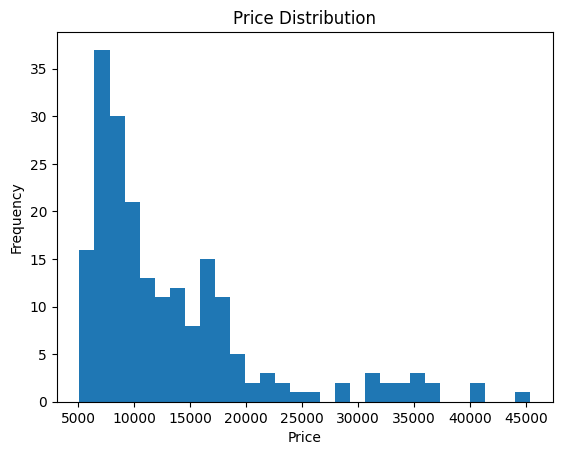

In [9]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
plt.figure()
df["price"].plot(kind= "hist", bins=30, title="Price Distribution")
plt.xlabel("Price")
plt.savefig(FIG_DIR / "price_distribution.png", bbox_inches='tight', dpi=150)
plt.show()

## Hoursepower Distribution 

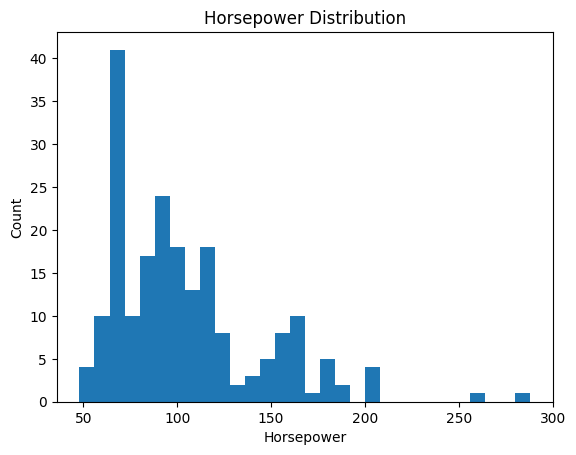

In [15]:
plt.figure()
df["horsepower"].plot(kind="hist", bins=30, title="Horsepower Distribution")
plt.xlabel("Horsepower"); plt.ylabel("Count")
plt.savefig(FIG_DIR / "mpl_horsepower_hist.png", bbox_inches="tight", dpi=150)
plt.show()

## Engine Size vs Price

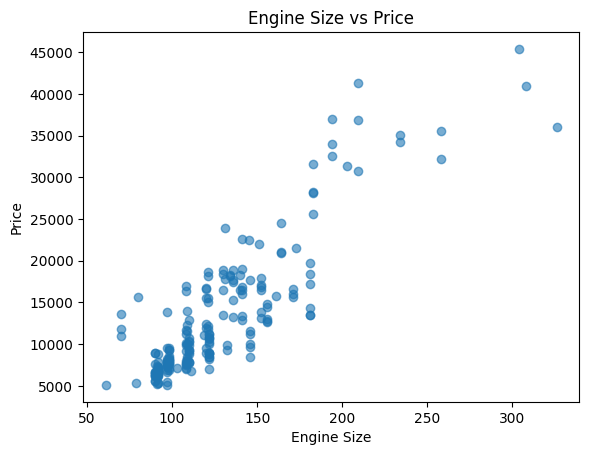

In [16]:
plt.figure()
plt.scatter(df["enginesize"], df["price"], alpha=0.6)
plt.title("Engine Size vs Price"); plt.xlabel("Engine Size"); plt.ylabel("Price")
plt.savefig(FIG_DIR / "mpl_enginesize_vs_price_scatter.png", bbox_inches="tight", dpi=150)
plt.show()

* Now I am going to apply Seaborn to visualise dataset

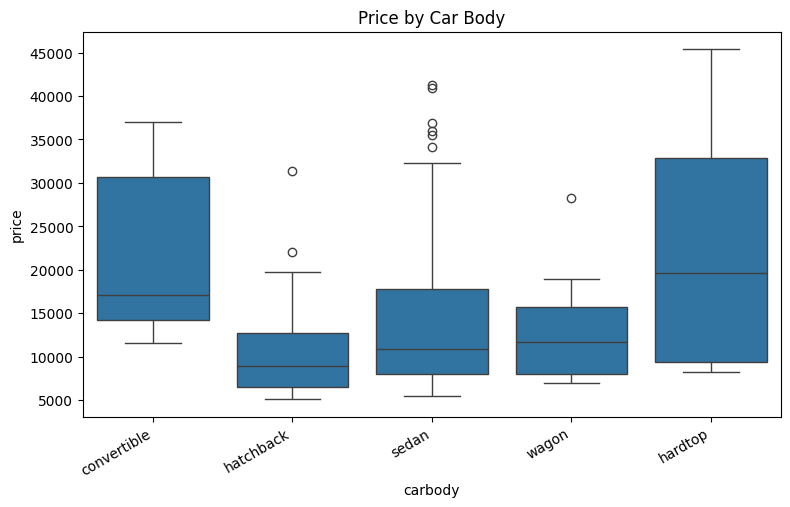

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# 4) Boxplot: Price by car body (if available)
if(["carbody","price"]): 
 plt.figure(figsize=(9,5))
sns.boxplot(data=df, x="carbody", y="price")
plt.title("Price by Car Body"); plt.xticks(rotation=30, ha="right")
plt.savefig(FIG_DIR / "sns_price_by_carbody_box.png", bbox_inches="tight", dpi=150)
plt.show()

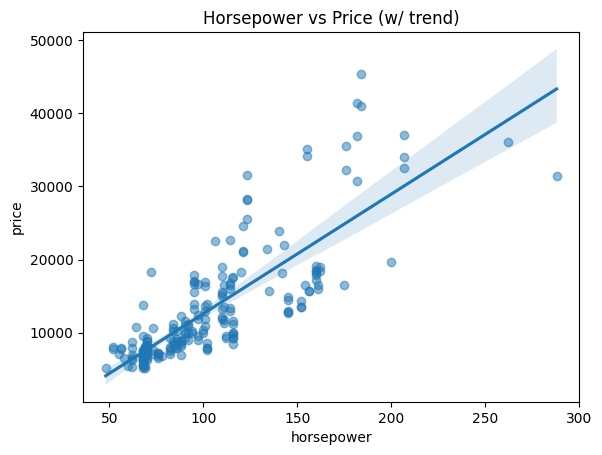

In [19]:
plt.figure()
sns.regplot(data=df, x="horsepower", y="price", scatter_kws={"alpha":0.5})
plt.title("Horsepower vs Price (w/ trend)")
plt.savefig(FIG_DIR / "sns_hp_vs_price_reg.png", bbox_inches="tight", dpi=150)
plt.show()

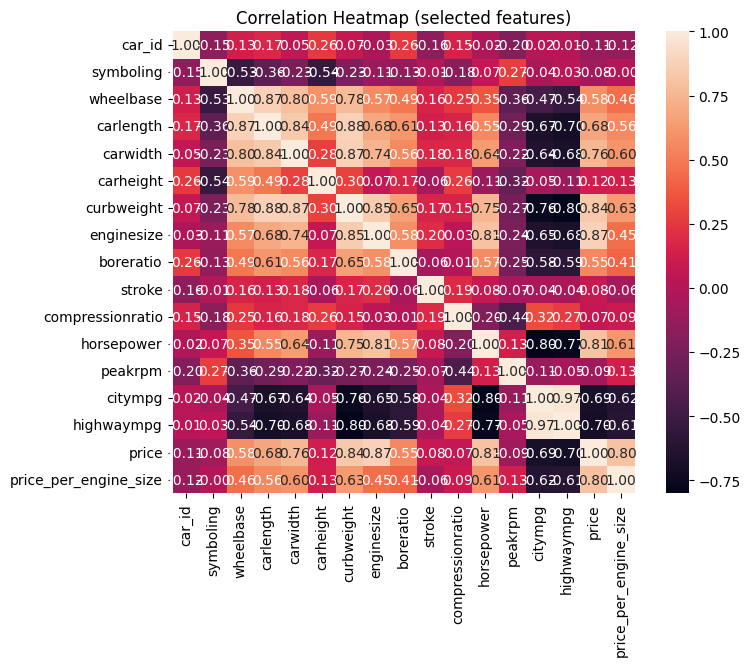

In [25]:
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
if len(num_cols) >= 2:
 plt.figure(figsize=(8,6))
 sns.heatmap(df[num_cols].corr(numeric_only=True), annot=True, fmt=".2f", square=True)
 plt.title("Correlation Heatmap (selected features)")
 plt.savefig(FIG_DIR / "sns_corr_heatmap.png", bbox_inches="tight", dpi=150)
 plt.show()

* the heatmap above showing too many variables. I have to find a way to fix it by removing non-useful column. 

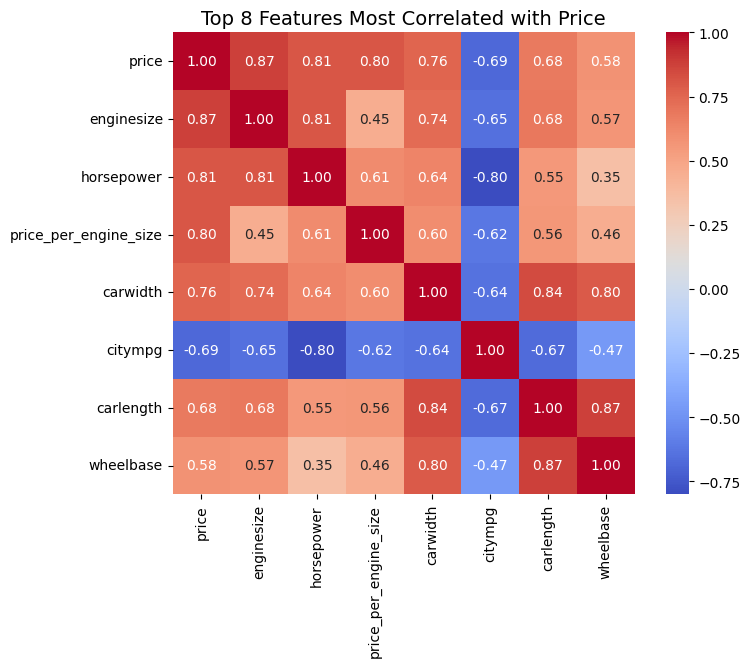

In [27]:
cols_to_exclude = ["car_id", "curbweight", "highwaympg"]
num_cols = [col for col in df.select_dtypes(include=['number']).columns if col not in cols_to_exclude]

# Correlation matrix
corr_matrix = df[num_cols].corr(numeric_only=True)

# Get top 8 most correlated with price (including price itself)
top_features = corr_matrix['price'].abs().sort_values(ascending=False).head(8).index

# Plot smaller, cleaner heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[top_features].corr(numeric_only=True),
            annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Top 8 Features Most Correlated with Price", fontsize=14)
plt.savefig(FIG_DIR / "sns_top8_corr_heatmap.png", bbox_inches="tight", dpi=150)
plt.show()


In [37]:
import plotly.express as px
color_col = "fueltype" if "fueltype" in df.columns else ("carbody" if "carbody" in df.columns else None)
fig = px.scatter(
    df,
    x="horsepower" if "horsepower" in df.columns else df.columns[0],
    y="price",
    color=color_col,
    opacity=0.6,
    title="Horsepower vs Price (interactive)"
    )
fig.write_html(str(FIG_DIR / "px_hp_vs_price.html")); fig.show()



In [38]:

fig = px.histogram(df, x="price", nbins=30, title=("Price Distribution (interactive)"))
fig.write_html(str(FIG_DIR / "px_price_hist.html")); fig.show()



In [39]:
#  Interactive box: Price by fuel type or carbody (whichever exists)
group_col = "fueltype" if "fueltype" in df.columns else ("carbody" if "carbody" in df.columns else None)
if group_col:
    fig = px.box(df, x=group_col, y="price", points="suspectedoutliers", title=f"Price by {group_col} (interactive)")
    fig.write_html(str(FIG_DIR / f"px_price_by_{group_col}.html")); fig.show()
else:
    print("No 'fueltype' or 'carbody' column found for Plotly boxplot.")